In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [19]:
from numpy.random import random_integers, random_sample, seed
from pandas import DataFrame

RANDOM_SEED = 20121020


def simulate_s_or_df(n_rows,
                     n_cols=1,
                     n_categories=None,
                     index_prefix='Feature ',
                     column_prefix='Sample ',
                     random_seed=RANDOM_SEED):
    """
    Simulate Series or DataFrame.
    :param n_rows: int; number of rows
    :param n_cols: int; number of columns; default to 1
    :param n_categories: None or int; continuous if None and categorical if int
    :param random_seed: int | array
    :return: DataFrame or Series; (n_rows, n_cols) or (n_cols)
    """

    seed(random_seed)

    if n_categories:
        # Simulate categorical df
        df = DataFrame(random_integers(0, n_categories - 1, (n_rows, n_cols)))

    else:
        # Simulate continuous df
        df = DataFrame(random_sample((n_rows, n_cols)))

    # Set indices and columns
    df.index = ['{} {}'.format(index_prefix, i) for i in range(n_rows)]
    df.columns = ['{} {}'.format(column_prefix, i) for i in range(n_cols)]

    if n_cols == 1:  # Return as series if there is only 1 column
        return df.iloc[:, 0]
    else:
        return df

In [20]:
n = 10

In [28]:
target = np.random.random_sample(n)
target

array([ 0.81393606,  0.76732412,  0.46783208,  0.25686238,  0.40962639,
        0.79564046,  0.79410139,  0.61942465,  0.62908425,  0.49139108])

In [29]:
features_continuous = simulate_s_or_df(n*8, n)
features_continuous

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.778303,0.715335,0.381965,0.812450,0.245684,0.065319,0.680434,0.592041,0.273859,0.417976
Feature 1,0.744461,0.092021,0.195240,0.422049,0.434608,0.194092,0.027115,0.084885,0.440930,0.554570
Feature 2,0.592818,0.519794,0.332468,0.571506,0.244323,0.247018,0.472235,0.019212,0.970689,0.362548
Feature 3,0.216193,0.182422,0.511653,0.166782,0.266294,0.612011,0.637109,0.275024,0.483312,0.558182
Feature 4,0.687266,0.136500,0.906504,0.982103,0.608994,0.062920,0.328824,0.903436,0.559522,0.836223
Feature 5,0.947108,0.199265,0.376819,0.651837,0.441513,0.094244,0.165971,0.769649,0.338418,0.868808
Feature 6,0.374021,0.500518,0.912980,0.731087,0.784207,0.787649,0.398593,0.997094,0.300667,0.934087
Feature 7,0.914344,0.727090,0.379951,0.160214,0.227681,0.677574,0.573571,0.364911,0.723193,0.987899
Feature 8,0.642626,0.912755,0.098331,0.405111,0.591694,0.396606,0.762895,0.970704,0.451949,0.764095
Feature 9,0.024336,0.307412,0.757671,0.278294,0.970952,0.615219,0.196425,0.258521,0.097461,0.535729


In [30]:
features_binary = simulate_s_or_df(n * 8, n, 2)
features_binary

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,0,1,0,0,1,1,1,1,1
Feature 1,1,1,1,1,0,1,0,0,0,1
Feature 2,0,1,1,1,0,1,0,1,0,1
Feature 3,0,1,1,1,0,1,0,0,1,1
Feature 4,1,1,0,0,0,0,0,1,0,1
Feature 5,1,0,1,0,1,0,0,0,0,0
Feature 6,0,0,1,1,1,0,1,0,0,0
Feature 7,0,1,1,1,0,1,0,1,0,0
Feature 8,0,1,1,1,0,0,0,0,1,0
Feature 9,0,1,0,1,1,0,0,0,0,1


Target None (10,) and features (80, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 30 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 30 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


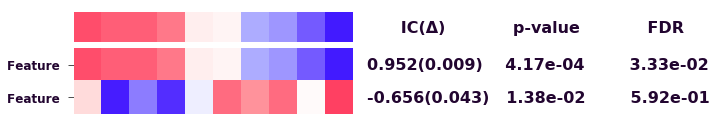

In [42]:
match_continuous = make_match_panel(target, features_continuous)

In [ ]:
match_binary = make_match_panel(target, features_binary)

Target None (10,) and features (80, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 30 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 30 permuted targets ...


In [36]:
make_summary_match_panel(target, [match_continuous, match_binary])

ValueError: not enough values to unpack (expected 7, got 4)